<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia
</center>
<center>

##**Lab 2: Statistics, Matplotlib and Seaborn**

</center>
<center>

###**Tenggat Waktu: 18 Februari 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_2106751404_NaznienFevrianneMalano.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 18 Februari 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
6. Pernyataan Integritas Wajib diisi dan dijalankan.
7. Seluruh kode wajib dijalankan.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [112]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [113]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


# Exploratory Data Analysis
*Exploratory Data Analysis* atau yang biasa disingkat EDA adalah proses eksplorasi dan analisis dataset untuk melihat pola yang muncul maupun karakteristik utama dari data. EDA adalah sebuah proses dasar yang dapat mempengaruhi keputusan-keputusan seseorang dalam melakukan *data processing, data modelling, dsb* yang akan dilanjutkan di tahapan selanjutnya. Proses *exploratory data analysis* melibatkan dua tahapan utama, yaitu *descriptive statistics* dan *data visualization*.


## Deskripsi "IMDB Movies Dataset"
- `name`: Judul film
- `rating`: Peringkat film berdasarkan kesesuaian dengan segmen penonton tertentu (R, PG, NC-17, dsb)
- `genre`: Genre utama film
- `year`: Tahun film dirilis
- `released`: Tanggal film dirilis (YYYY-MM-DD)
- `score`: Rata-rata nilai film yang diberikan oleh user IMDB
- `votes`: Banyak user IMDB yang memberi nilai terhadap film
- `director`: Sutradara film
- `writer`: Penulis naskah film
- `star`: Pemeran utama film
- `country`: Negara produksi film
- `budget`: Biaya yang dikeluarkan untuk produksi film
- `gross`: Pendapatan kotor dari penayangan film
- `company`: Perusahaan rumah produksi film
- `runtime`: Durasi film (dalam menit)

In [114]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualisasi
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("movies.csv", index_col=0)

In [117]:
total_rows, total_attributes = df.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

df.head()

Jumlah data:  7665
Jumlah atribut:  14


,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, The Shining to Tee em el
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7590 non-null   object 
 1   genre     7665 non-null   object 
 2   year      7665 non-null   int64  
 3   released  7663 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   int64  
 6   director  7665 non-null   object 
 7   writer    7662 non-null   object 
 8   star      7664 non-null   object 
 9   country   7662 non-null   object 
 10  budget    5494 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7650 non-null   object 
 13  runtime   7661 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 898.2+ KB


In [119]:
#note: ini ada beberapa yang null di kolom

In [120]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7665.000000,7665.000000,7.665000e+03,5.494000e+03,7.479000e+03,7661.000000
mean,2000.397782,6.390411,8.810850e+04,3.560912e+07,7.850054e+07,107.260410
std,11.148950,0.968842,1.633238e+05,4.146043e+07,1.657251e+08,18.582606
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.075000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [121]:
df.describe(include=object)

,rating,genre,released,director,writer,star,country,company
count,7590,7665,7663,7665,7662,7664,7662,7650
unique,12,19,3412,2947,4532,2811,59,2384
top,R,Comedy,"October 4, 1991 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3696,2245,9,38,37,43,5472,377


## Descriptive Statistics
Berikut adalah berbagai pengukuran yang dapat diterapkan untuk statistik deskriptif yang sudah pernah dipelajari sebelumnya di mata kuliah Statistika dan Probabilitas:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variablity* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quartile
6. Percentile

**Central tendency dapat digunakan untuk melihat distribusi data**. Biasanya, `mean` lebih cocok digunakan untuk distribusi normal (persebaran data simetris di tengah), sementara `median` lebih cocok digunakan untuk melihat distribusi yang *skewed* (condong sebelah). Dan untuk data kategorikal, hanya bisa menggunakan `mode`.

Namun, *central tendency* tidak cukup untuk melihat distribusi data. *Central tendency* tidak dapat menggambarkan tingkat persebaran data. **Measure of dispersion** adalah pengukuran yang dapat digunakan untuk melihat **keberagaman data atau seberapa tinggi persebaran data**. Ada beberapa pengukuran untuk menentukan dispersi data, seperti dengan jangkauan atau `range` maupun simpangan baku atau `standard deviation`

Berikut adalah penggunaan statistik deskriptif (1), (2), (3) dari atribut `Score`:


In [122]:
score_arr = df["score"].dropna()
stats = [
    ['Mean', np.mean(score_arr)],
    ['Median', np.median(score_arr)],
    ['Mode', scp.mode(score_arr)[0]],
    ['Standard Deviation', np.std(score_arr)],
    ['Variance', np.var(score_arr)],
    ['Minimum', np.min(score_arr)],
    ['Maximum', np.max(score_arr)],
]
pd.DataFrame(stats, columns=['Measure', 'Value'])


,Measure,Value
0,Mean,6.390411
1,Median,6.5
2,Mode,[6.6]
3,Standard Deviation,0.968778
4,Variance,0.938532
5,Minimum,1.9
6,Maximum,9.3


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, The Shining to Tee em el
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7590 non-null   object 
 1   genre     7665 non-null   object 
 2   year      7665 non-null   int64  
 3   released  7663 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   int64  
 6   director  7665 non-null   object 
 7   writer    7662 non-null   object 
 8   star      7664 non-null   object 
 9   country   7662 non-null   object 
 10  budget    5494 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7650 non-null   object 
 13  runtime   7661 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 898.2+ KB


In [124]:
# Misalkan df adalah DataFrame Anda
duplicate_labels = df.index[df.index.duplicated()]
print("Label yang duplikat pada sumbu indeks:", duplicate_labels)

# Jika Anda ingin menampilkan baris dengan label yang sama
duplicate_rows = df[df.index.duplicated(keep=False)]
print("Baris dengan label yang sama pada sumbu indeks:")
print(duplicate_rows)


Label yang duplikat pada sumbu indeks: Index(['The Bear', 'Impulse', 'Paradise', 'Forever Young', 'Dream Lover',
       'Boiling Point', 'Nobody's Fool', 'Heat', 'Bad Boys', 'It Takes Two',
       ...
       'Aladdin', 'Anna', 'The Addams Family', 'Serenity', 'Pet Sematary',
       'The Kid', 'Child's Play', 'Shaft', 'After the Wedding', 'The Captain'],
      dtype='object', name='name', length=156)
Baris dengan label yang sama pada sumbu indeks:
                  rating      genre  year                           released  \
name                                                                           
Friday the 13th        R     Horror  1980        May 9, 1980 (United States)   
Fame                   R      Drama  1980       May 16, 1980 (United States)   
The Fog                R     Horror  1980   February 8, 1980 (United States)   
Prom Night             R     Horror  1980      July 18, 1980 (United States)   
The Island             R     Action  1980      June 13, 1980 (United 

In [125]:
df.index

Index(['The Shining', 'The Blue Lagoon',
       'Star Wars: Episode V - The Empire Strikes Back', 'Airplane!',
       'Caddyshack', 'Friday the 13th', 'The Blues Brothers', 'Raging Bull',
       'Superman II', 'The Long Riders',
       ...
       'Legend of Deification', 'Tulsa', 'Leap', 'Black Wall Street Burning',
       'I Am Fear', 'Aloha Surf Hotel', 'More to Life', 'Dream Round',
       'Saving Mbango', 'Tee em el'],
      dtype='object', name='name', length=7665)

In [126]:
df[df.index == "Fame"]

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
Fame,PG,Comedy,2009,"September 25, 2009 (United States)",5.1,16000,Kevin Tancharoen,Allison Burnett,Kelsey Grammer,United States,18000000.0,77211836.0,Metro-Goldwyn-Mayer (MGM),107.0


Dapat dilihat dari penghitungan statistik deskriptif di atas bahwa `mean` < `median` < `mode`. Data juga tersebar sebesar 0.96 dari nilai `mean`. Dengan nilai maksimum 9.3 dan nilai minimum 1.9, ada kemungkinan bahwa data cenderung lebih padat sedikit ke kanan dari rata-rata.
<br>
Diluar central tendency dan dispersion, penghitungan statistik deskriptif juga termasuk mengukur kemiringan atau asimetri distribusi (`skewness`). `Skewness` dapat mempengaruhi pemrosesan data data, contohnya dalam menangani nilai *null* dengan *central tendency* yang tepat atau melakukan *sampling*.
<br>
*Skewness* juga dapat diperiksa dengan visualisasi `Kernel Density Estimation (KDE) plot`. KDE plot menunjukkan estimasi dari fungsi probabilitas *density* pada sebuah data yang bersifat kontinu.



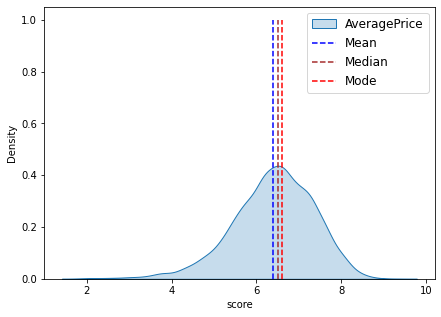

In [127]:
# KDE Plot (Distribusi data) dari AveragePrice
score_arr = score_arr.reset_index(drop=True)
plt.figure(figsize=(7,5))
sns.kdeplot(score_arr, fill=True)
plt.vlines(x=np.mean(score_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(score_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(score_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['AveragePrice', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat bahwa distribusi cenderung bersifat normal. Berdasarkan visualisasi, mean dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data.

Kita juga dapat memastikan hipotesis tersebut dengan memeriksa nilai *skewness* dari atribut-atribut numerik dengan menggunakan fungsi `.skew()` berikut:

In [128]:
num_df = df.select_dtypes(include=["float64"])
num_df.skew()

score     -0.604433
budget     2.453241
gross      5.314390
runtime    2.096309
dtype: float64

Berikut ini adalah interpretasi yang dapat digunakan dalam mengambil kesimpulan dari nilai skewness:
- Jika nilai positif, maka right skewed (right-tailed > left-tailed)
- Jika nilai negatif, maka left skewed (left-tailed > right-tailed)
- Jika skewness = 0, maka data simetris.
Dari hasil tersebut, dapat dilihat bahwa atribut `runtime`, `budget`, `gross` memiliki karakteristik right skewed yang cukup tinggi. Sementara `score` cenderung left skewed namun tingkat asimetrisnya rendah sehingga dapat dikategorikan mendekati normal.
<br>
<br>

Untuk membandingkan distribusi dua data, kita dapat menggunakan overlapping Histogram atau KDE plot.
Pada contoh kali ini, kita dapat mencoba melihat perbandingan `budget` pada film dengan rating PG dan R.


In [129]:
# Memisahkan dataset menjadi Pemain Jerman dan Spanyol
pg_rated = df[df['rating'] == "PG"]
r_rated = df[df['rating'] == "R"]
# Mengambil tingginya
pg_runtime = pg_rated['runtime']
r_runtime = r_rated['runtime']
pg_runtime

name
Star Wars: Episode V - The Empire Strikes Back    124.0
Airplane!                                          88.0
Superman II                                       127.0
Any Which Way You Can                             116.0
The Gods Must Be Crazy                            109.0
                                                  ...  
The Fighting Preacher                             100.0
Onward                                            102.0
Sonic the Hedgehog                                 99.0
Dolittle                                          101.0
The Call of the Wild                              100.0
Name: runtime, Length: 1252, dtype: float64

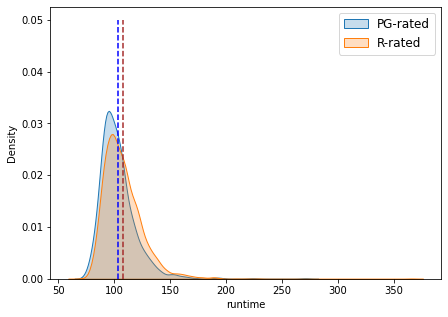

In [130]:
# KDE Plot
#reset index 
pg_runtime = pg_runtime.reset_index(drop= True)
r_runtime = r_runtime.reset_index(drop=True)
plt.figure(figsize=(7,5))
sns.kdeplot(pg_runtime, fill=True)
sns.kdeplot(r_runtime, fill=True)
plt.legend(['PG-rated','R-rated'], fontsize=12)
plt.vlines(x=pg_runtime.mean(), ymin=0, ymax=0.05, color='blue', linestyle='--')
plt.vlines(x=r_runtime.mean(), ymin=0, ymax=0.05, color='brown', linestyle='--')
plt.show()

## Correlation

Korelasi adalah pengukuran tingkat ketergantungan antar atribut dalam dataset. Korelasi biasanya digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak dengan atribut lainnya.

Seperti yang sudah dipelajari di mata kuliah Statistika dan Probabilitas, terdapat berbagai pilihan jenis korelasi yang dapat digunakan pada jenis data yang berbeda. Salah satunya adalah **Pearson correlation** yang sering digunakan untuk mengukur korelasi atribut numerik. Rata-rata dan varians digunakan dalam menghitung korelasi *pearson*, sehingga sebelum menghtung korelasi, perlu dipastikan bahwa atribut yang terpilih termasuk dalam skala interval atau ratio. Pada dataset ini, atribut dengan skala pengukuran interval adalah `year`, dan atribut dengan skala pengukuran rasio adalah `year`, `score`, `votes`, `budget`, `gross` dan `runtime`.

In [131]:
#df.corr(method='pearson', numeric_only=True)
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.330465,0.257486,0.120785
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.330465,0.076254,0.442429,1.000000,0.740395,0.320623
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120785,0.399451,0.309212,0.320623,0.245216,1.000000


 Selain metode *pearson*, ada metode correlation lain yang juga pernah dipelajari sebelumnya di mata kuliah Statistika dan Probabilitas, yaitu metode `spearman rho`. Perbedaan mendasar dari kedua metode tersebut adalah metode *pearson* dihitung berdasarkan perbedaan antara nilai sebenarnya dan nilai rata-rata, dibagi dengan standar deviasi, sementara metode *spearman* dihitung berdasarkan peringkat (peringkat ordinal) dari nilai setiap variabel. Karena penghitungan dengan `pearson` menggunakan rata-rata dan varians, maka skala pengukuran atributnya harus dipastikan interval dan ratio. Sementara itu, penghitungan `spearman rho` menggunakan rank, sehingga `spearman rho` dapat juga mengukur korelasi dari atribut dengan skala pengukuran ordinal.

In [132]:
#df.corr(method='spearman', numeric_only=True)
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr(method='spearman')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.319448,0.293084,0.142895
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.319448,-0.001403,0.502466,1.000000,0.693670,0.336932
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142895,0.399857,0.290159,0.336932,0.246243,1.000000


Dari tabel koefisien korelasi pearson, kita dapat melihat pasangan atribut apa saja yang memiliki tingkat dependensi yang tinggi. Korelasi tertinggi dengan metode *pearson* adalah `budget` dan `gross`, sementara untuk metode *spearman* adalah `gross` dan `votes`. Untuk membuktikan, kita dapat melakukan visualisasi `scatter plot` dari psalah satu dari pasangan atribut tersebut.

<AxesSubplot:xlabel='gross', ylabel='budget'>

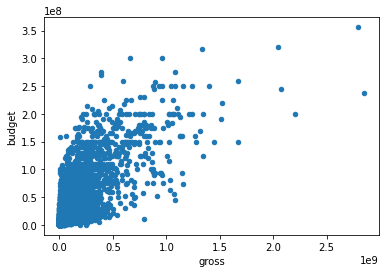

In [133]:
# Membuat scatterplot untuk value_euro terhadap overall_rating
df.plot.scatter(x="gross", y="budget", figsize=(6,4))

Dapat dilihat dari visualisasi scatter plot menunjukkan bahwa ada hubungan positif antara "budget" dan "gross" pada data yang digunakan. Dalam visualisasi scatter plot di atas, terlihat bahwa sebaran titik data yang cenderung membentuk pola diagonal ke kanan atas. Artinya, semakin tinggi nilai `budget`, maka nilai `gross` cenderung semakin tinggi.


## Data Visualization


### Melihat jumlah film dari setiap rating category


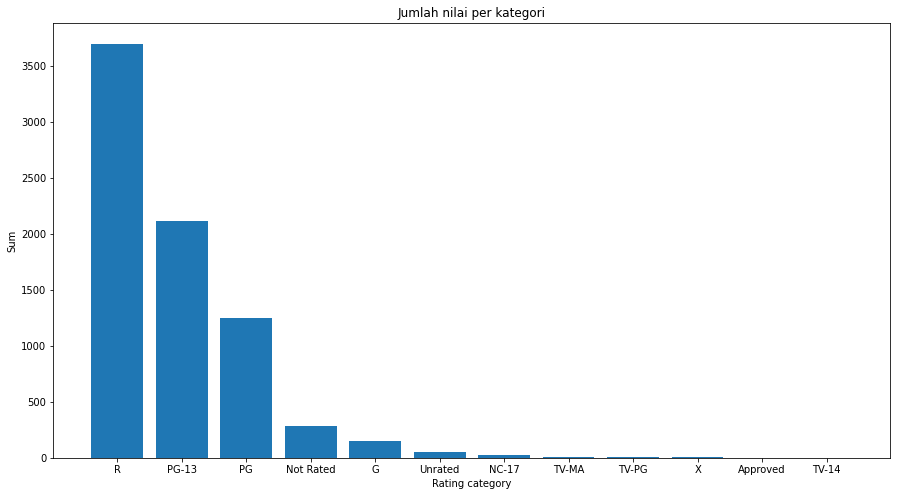

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai setiap kategori
jumlah_per_kategori = df['rating'].value_counts()

plt.figure(figsize=(15,8))
# Membuat bar chart
plt.bar(jumlah_per_kategori.index, jumlah_per_kategori.values)

# Menambahkan label pada sumbu x dan y serta judul
plt.xlabel('Rating category')
plt.ylabel('Sum')
plt.title('Jumlah nilai per kategori')

# Menampilkan plot
plt.show()


Dari bar chart di atas, dapat dilihat bahwa atribut `rating_category` memiliki data yang tidak seimbang, dimana lebih banyak film memiliki rating R, PG-13 dan PG dibanding kategori rating lainnya.

### Melihat jumlah film dari setiap genre

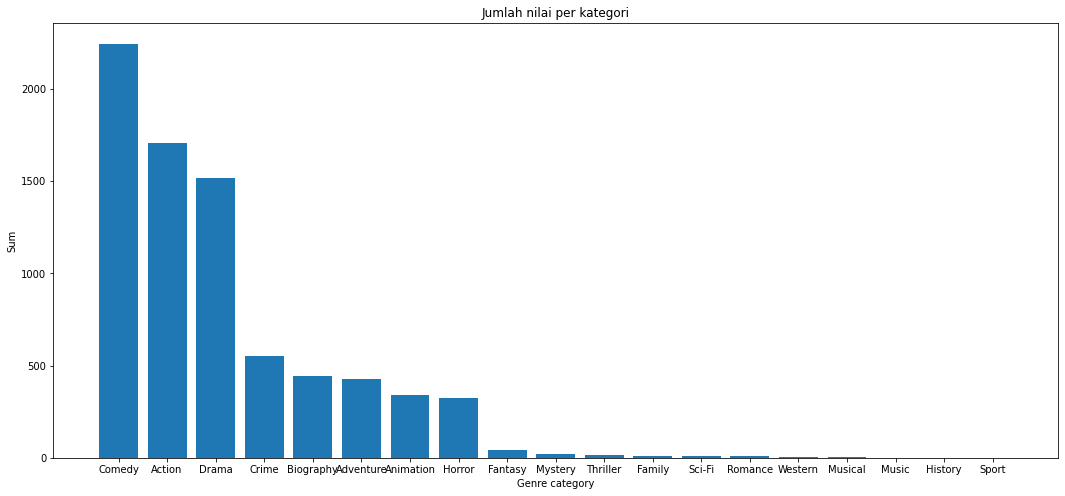

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai setiap kategori
jumlah_per_kategori = df['genre'].value_counts()

plt.figure(figsize=(18,8))
# Membuat bar chart
plt.bar(jumlah_per_kategori.index, jumlah_per_kategori.values)

# Menambahkan label pada sumbu x dan y serta judul
plt.xlabel('Genre category')
plt.ylabel('Sum')
plt.title('Jumlah nilai per kategori')

# Menampilkan plot
plt.show()


Dapat dilihat bahwa genre dengan jumlah film paling banyak di dataset adalah Comedy, Action dan Drama. Sementara itu, genre dengan jumlah film paling sedikit di dataset adalah Music, History dan Sport.

### Menampilkan boxplot Score terhadap Genre

<AxesSubplot:xlabel='genre', ylabel='score'>

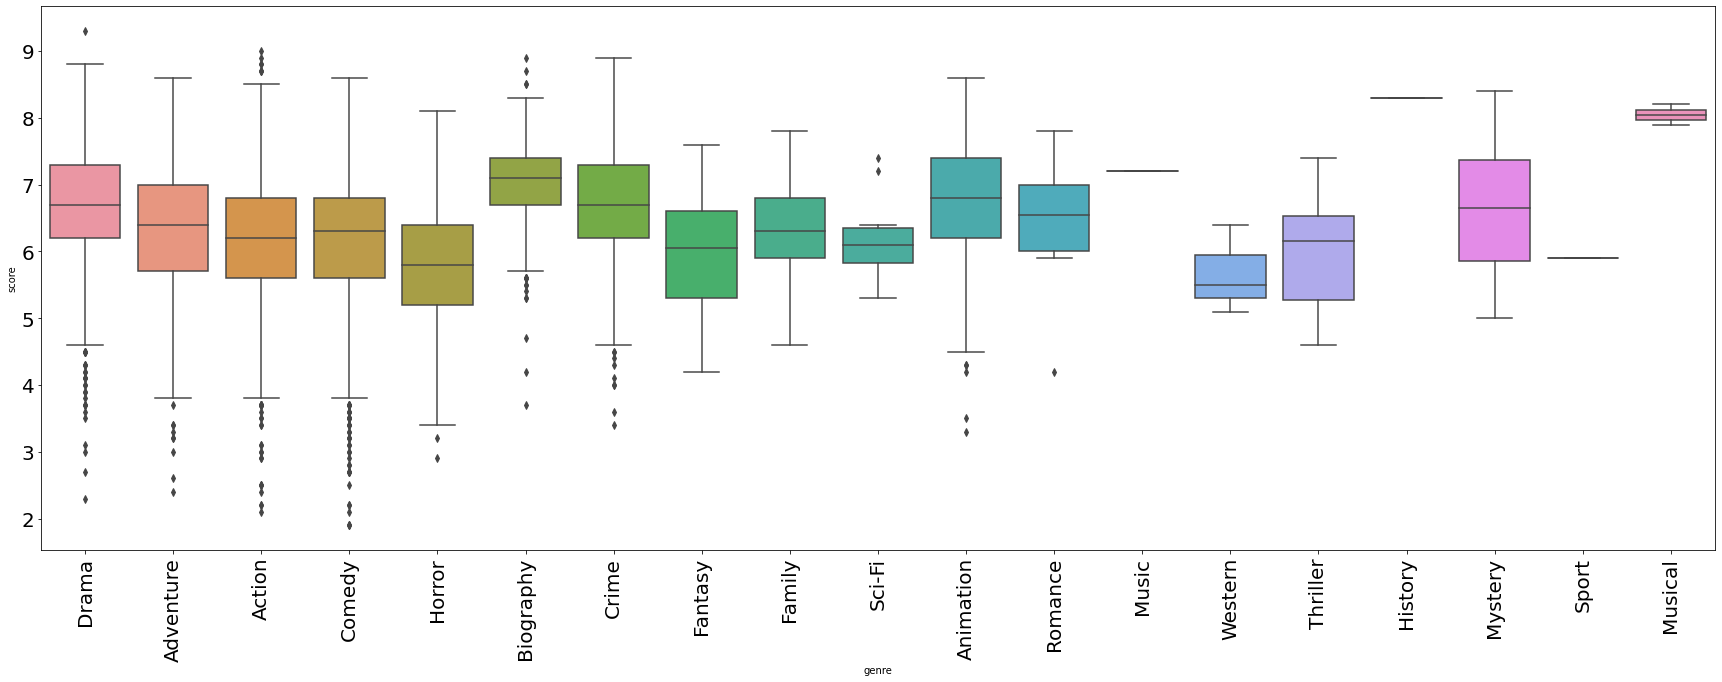

In [136]:
# Menampilkan boxplot Score terhadap Genre
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='genre', y='score')

# Latihan Soal


### **SOAL 1: Descriptive Statistics**

#### 1a. Tampilkan descriptive statistics dari atribut `votes` beserta dengan range, Q1, Q2 dan Q3-nya!

In [137]:
votes_arr = df["votes"].dropna() #walaupun tidak ada data yang null
stats = [
    ['Mean', np.mean(votes_arr)],
    ['Median', np.median(votes_arr)],
    ['Mode', scp.mode(votes_arr)[0]],
    ['Standard Deviation', np.std(votes_arr)],
    ['Variance', np.var(votes_arr)],
    ['Minimum', np.min(votes_arr)],
    ['Maximum', np.max(votes_arr)],
    ['Range', np.max(votes_arr) - np.min(votes_arr)],
    ['Q1', np.quantile(votes_arr, 0.25)],
    ['Q2', np.quantile(votes_arr, 0.5)],
    ['Q3', np.quantile(votes_arr, 0.75)],
]
pd.DataFrame(stats, columns=['Measure', 'Value'])


,Measure,Value
0,Mean,88108.504762
1,Median,33000.0
2,Mode,[13000]
3,Standard Deviation,163313.109696
4,Variance,26671171798.617363
5,Minimum,7
6,Maximum,2400000
7,Range,2399993
8,Q1,9100.0
9,Q2,33000.0


>Sesuai dengan tabel diatas
>- Mean	88108.504762
>- Median	33000.0
>- Mode	[13000]
>- Standard Deviation	163313.109696
>- Variance	26671171798.617363
>- Minimum	7
>- Maximum	2400000
>- Range	2399993
>- Q1	9100.0
>- Q2	33000.0
>- Q3	93000.0

#### 1b. Apa central tendency yang paling cocok digunakan untuk atribut `runtime`? Berikan alasan!

In [138]:
runtime_attr = df['runtime'].dropna()

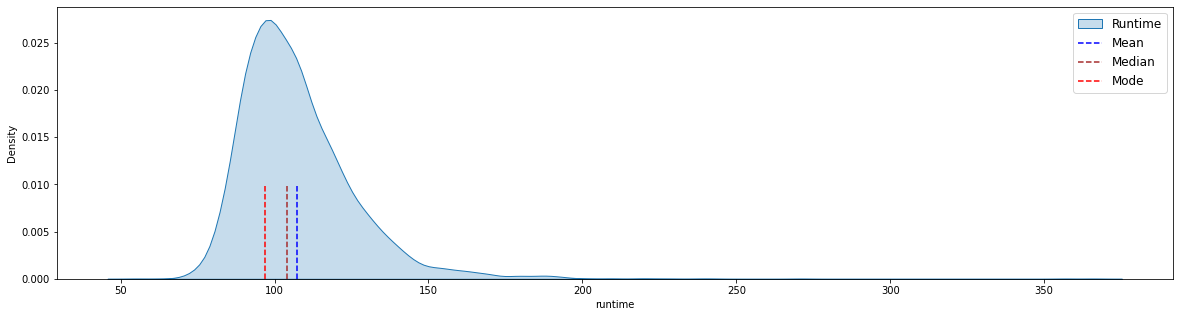

In [139]:
plt.figure(figsize=(20,5))
#reset runtime_attr index
runtime_attr = runtime_attr.reset_index(drop =True)
sns.kdeplot(runtime_attr, fill=True)
plt.vlines(x=np.mean(runtime_attr), ymin=0, ymax=0.01, color='blue', linestyle='--')
plt.vlines(x=np.median(runtime_attr), ymin=0, ymax=0.01, color='brown', linestyle='--')
plt.vlines(x=scp.mode(runtime_attr)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
plt.legend(['Runtime', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

In [140]:
runtime_attr.skew()

2.0963086140122065

> Berdasarkan dari nilai hasil dari fungsi .skew() yang bernilai positif  dan nilai mode < median < mean, maka distribusi atribut runtime adalah right skewed atau lebih padat ke kiri.
Untuk right skewed, centra tendency yang cocok digunakan adalah median, dibandingkan dengan mediannya, karena mean sensitif terhadap nilai ekstrim, sehingga tidak bagus dalam menyatakan pusat data. Sedangkan, median tidak sensitif terhadap outliers, sehingga sesuai untuk menjadi central tendency dari atribut runtime





#### 1c. Buatlah heatmap dengan korelasi Pearson dari dataset `movies.csv`, berikan analisis dan *insight* yang kamu peroleh dari heatmap tersebut!

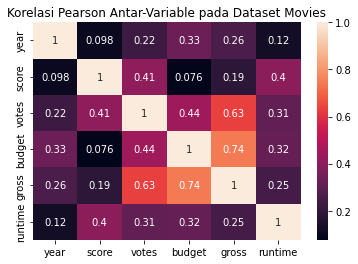

In [141]:
#Jawab nomor 1c
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('Korelasi Pearson Antar-Variable pada Dataset Movies')
plt.show()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, The Shining to Tee em el
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7590 non-null   object 
 1   genre     7665 non-null   object 
 2   year      7665 non-null   int64  
 3   released  7663 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   int64  
 6   director  7665 non-null   object 
 7   writer    7662 non-null   object 
 8   star      7664 non-null   object 
 9   country   7662 non-null   object 
 10  budget    5494 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7650 non-null   object 
 13  runtime   7661 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


> Berdasarkan heatmap di atas, kita bisa melihat ada kolom yang memiliki korelasi positif dengan kolom lainnya, antara lain:
- Kolom votes dengan kolom gross (0.63) -> semakin besar nilai votesnya, maka semakin besar juga nilai gross (pendapatan kotor) dari film tersebut. Pernyataan ini masuk akal, yang mana film yang banyak ditonton, pasti film tersebut juga lebih banyak mendapatkan angka votes, dan otomatis film tersebut memiliki angka pembelian yang lebih banyak, dibandingkan dengan film yang tidak memiliki angka vote banyak.
- Kolom budget dan kolom gross (0.74) - semakin besar nilai budgetnya maka semakin besar nilai grossnya. Pernyataan ini bisa saja dikarenakan film dengan budget yang besar, pasti memiliki kualitas yang bagus dari segi sinematografi atau pemainnya. Hal ini membuat banyak penonton menonton film tersebut, sehingga pendapatan kotor film tersebut meningkat.


> Beberapa korelasi positif namun kuatnya berada di level sedang. Beberapa diantaranya:
- Korelasi votes dan budget (0.44) -> semakin banyak votes dari suatu film , semakin banyak juga budget yang dikeluarkan untuk membuat film tersebut
- Korelasi score dan votes (0.41) -> semakin besar nilai score untuk suatu film, semakin banyak juga votes untuk film tersebut
- Korelasi year dan budget (0.33) -> film dari tahun ke tahun memiliki budget yang lebih besar


> Korelasi positif yang bersifat lemah juga ada. Korelasi ini lebih banyak antara year dengan atribut yang lain. Beberapa korelasi tersebut antara lain:
- Korelasi year dan runtime (0.12) -> semakin baru tahun terbit filmnya maka semakin lama durasi dari film ini. Namun, karena korelasinya rendah, ini berarti hanya ada sedikit peningkatan durasi rata -rata fim dari tahun ke tahun
- Korelasi year dan gross (0.26) -> film dari tahun ke tahun memiliki pendapatan kotor yang semakin besar.
- Korelasi year dan score (0.098) -> film dari tahun ke tahun memiliki nilai score yang semakin besar
- Korelasi year dan votes (0.22) -> film dari tahun ke tahun memiliki banyak votes yang semakin besar
- Korelasi runtime dan gross, dan korelasi lainnya yang dibawah nilai 0.3


> Secara keseluruhan, tiap kolom dengan kolom lainnya mempunyai korelasi yang positif, tidak ada korelasi yang negatif. Hal ini mengindikasikan adanya hubungan positif atau ketergantungan antara nilai-nilai dari atribut tersebut, walaupun level kekuatannya berbeda-beda. Seperti, korelasi antara skor dan votes dengan score dan budget. Nilai score suatu film lebih ditentukan kuat oleh seberapa besar banyak votes dari film tersebut, dibandingkan dengan seberapa banyak budget untuk membuat film tersebut.





### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE plot
* Bubble plot

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

#### 2a. Buatlah visualisasi untuk melihat jumlah rata-rata  `score` film tiap `genre`. Apakah genre Horror termasuk lima film dengan rata-rata score tertinggi? Tulis chart apa yang kamu pilih dan alasannya.

In [143]:
df.genre.value_counts()

Comedy       2245
Action       1704
Drama        1516
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

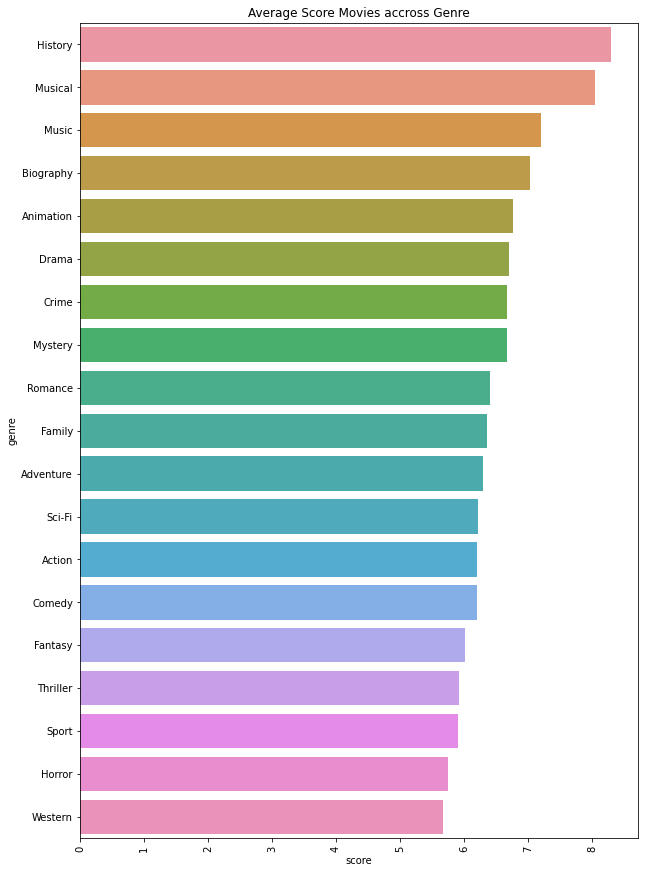

In [144]:
#Jawab nomor 2
score_by_genre = df.groupby('genre')[['score']].mean().sort_values('score', ascending = False)

#bar graph secara horizontal
plt.figure(figsize=(10, 15))
plt.xticks(rotation=90)
sns.barplot(x=score_by_genre['score'], y=score_by_genre.index)
plt.title('Average Score Movies accross Genre')
plt.show()

In [145]:
score_by_genre

,score
genre,
History,8.300000
Musical,8.050000
Music,7.200000
Biography,7.030926
Animation,6.769231
Drama,6.693668
Crime,6.671506
Mystery,6.665000
Romance,6.410000


> Horor tidak termasuk pada lima film dengan rata-rata score tertinggi. Lima genre yang masuk kedalam lima film dengan rata-rata score tertinggi adalah film dengan genre Comedy, Action, Drama, Crime, dan Biography.
> Chart yang saya pilih adalah horizontal bar graph. Alasan menggunakan bar graph adalah nilai dari mean score ini adalah diskrit dan adanya perbandingan (menggunakan bar atau batang secara visual lebih mudah untuk menentukan mana film yang memiliki score lebih tinggi). Alasan mengapa menggunakan horizontal, karena data ini memiliki banyak value unik di attribut genre, agar graph nanti tidak terlalu kecil karena harus melintang ke samping, maka saya buat secara horizontal, agar memanjang kebawah, dan angka dari graph tersebut masih terlihat.





#### 2b. Buatlah visualisasi *tren* rata-rata `gross` film pertahun. Visualisasi apa yang cocok digunakan? Berikan alasan. Selain itu, berikan *insight* yang dapat kamu peroleh dari visualisasi yang telah kamu buat. Tuliskan juga chart apa yang kamu pilih dan alasannya.

In [146]:
#ditemukan ada nan value di attribut gross 
#saya mengecek distribusi dari gross -> memilki right skewed dengan nilai max sangat jauh lebih banyak daripada nilai min 
#pengisiain nan value dengan max value dari gross  untuk tiap tahunn film tersebut 

In [147]:
df[df['gross'].isna()]

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000.0,NaN,ITC Films,115.0
Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,NaN,NaN,The South Australian Film Corporation,107.0
The Boogey Man,R,Horror,1980,"November 7, 1980 (United States)",4.6,3900,Ulli Lommel,Ulli Lommel,Suzanna Love,United States,300000.0,NaN,The Jerry Gross Organization,82.0
Lion of the Desert,PG,Biography,1980,"May 16, 1981 (Japan)",8.3,15000,Moustapha Akkad,David Butler,Anthony Quinn,Libya,35000000.0,NaN,Falcon International Productions,173.0
Can't Stop the Music,PG,Biography,1980,"June 20, 1980 (United States)",4.2,3700,Nancy Walker,Bronte Woodard,Ray Simpson,United States,20000000.0,NaN,EMI Films,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


<AxesSubplot:>

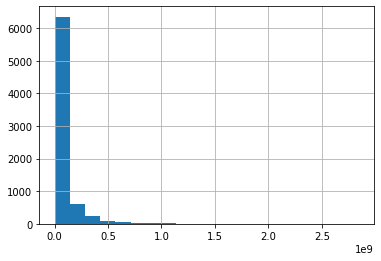

In [148]:
df['gross'].hist(bins=20)

In [149]:
#mengisi nan value dengan max value dari gross untuk tiap tahun film tersebut
df['gross'] = df['gross'].fillna(df.groupby('year')['gross'].transform('max'))

In [150]:
#tren rata rata gross film per tahun 
#dibgai 10 pangkat 6 agar lebih mudah dibaca -> (in million)
gross_peryear = ((df.groupby('year')[['gross']].mean())/10**6).sort_values('year')

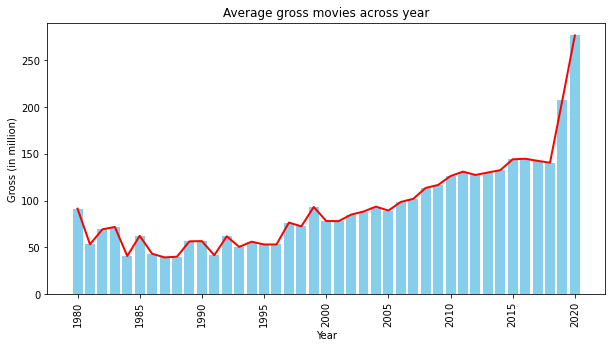

In [151]:
plt.figure(figsize=(10, 5))
plt.bar(gross_peryear.index, gross_peryear['gross'], color='skyblue')
plt.plot(gross_peryear.index, gross_peryear['gross'], color='red', linewidth=2)
plt.xticks(rotation=90)
plt.ylabel('Gross (in million)')
plt.xlabel('Year')
plt.title('Average gross movies across year')

plt.show()

In [152]:
# gross_peryear

In [153]:
276.284078 - 140.426447

135.85763100000003

In [154]:
# #menghiutng 2020 secara manual dulu untku memastikan 
# ta = df[df['year'] == 1980]
# ta['gross'].mean() / 10**6

> Visualisasi yang cocok digunakan adalah bar plot, tetapi saya menambahkan ada linenya untuk lebih melihat seperti apa kenaikan dan penurunan gross di tiap tahunnya. Visualisasi ini cocok untuk membandingkan secara langsung tiap tahun, berapa nilai gross film yang ada. Kita bisa melihat tren kenaikan dan penurunan secara spesifik, dan juga bisa melihat proporsi perubahan tersebut. Sebenarnya, buble graph juga bisa sesuai sesuai saja, tetapi jika tujuannya hanya ingin melihat fokus ke proporsi tahun mana yang film -film memiliki pendapatan kotor terbesar dan terkecil, tanpa ingin mengetahui tren naik dan turunnya.


> Insight yang saya dapatkan adalah terdapat tren angka yang cukup stabil untuk rata-rata pendapatan kotor film di rentang 40 million sampai 100 million pada tahun 1980 - sebelum tahun 2000. Mulai dari tahun 2000 sampai tahun-tahun berikutnya rata-rata pendapatan kotor film mulai terus naik di atas angka 100 million. Lonjakan yang tinggi muncul di tahun 2018 ke 2020, dengan selisih kenaikan adalah 135 million. Jika dikaitkan dengan nilai korelasi, kenaikan gross berkorelasi positif kuat dengan kenaikan budget dan votes. Ini bisa saja berarti film sudah mulai diproduksi dengan kualitas cerita dan grafis yang jauh lebih menarik dibandingkan dengan tahun-tahun sebelumnya. Hipotesis kedua, ini bisa berarti penonton lebih aktif dalam melakukan vote, bisa jadi karena distribusi bioskop lebih tersebar daripada tahun sebelumnya, atau pengaruh media sosial yang memiliki peran dalam mereview dan mempromosikan film




#### 2c. Buatlah visualisasi yang menunjukkan perbandingan **persentase jumlah film dengan score dalam rentang 8.5 sampai 10 tiap negara terhadap seluruh film dalam rentang 8.5 sampai 10.** (Contoh: Misalkan India punya 5 film yang punya score dalam rentang 8.5 sampai 10, dan ada 100 film di dataset yang punya score di rentang 8.5 sampai 10, maka persentase india adalah 5%. Anda perlu menentukan persentase untuk setiap negara yang memiliki film dalam rentang 8.5 sampai 10 tersebut, dan tampilkan visualisasinya). Berapa **persentase** film yang berasal dari Perancis?

In [156]:
# df.country.value_counts()

In [157]:
df[df['country']== 'India'].score.value_counts()

8.1    8
8.2    8
8.0    5
7.9    4
7.2    3
8.4    3
6.7    2
6.6    2
7.3    2
7.6    2
7.8    2
7.4    2
7.0    2
6.1    1
2.2    1
4.2    1
5.6    1
4.9    1
5.5    1
6.9    1
6.3    1
6.5    1
5.2    1
3.6    1
8.3    1
5.8    1
7.5    1
7.7    1
8.5    1
4.5    1
Name: score, dtype: int64

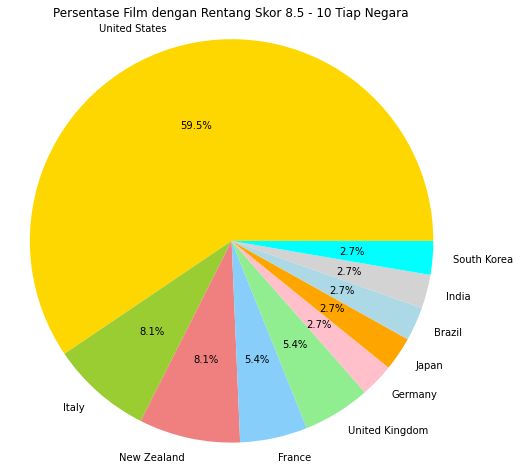

Detail Persentase Film untuk Tiap Negara: 
United States: 59.46%
Italy: 8.11%
New Zealand: 8.11%
France: 5.41%
United Kingdom: 5.41%
Germany: 2.70%
Japan: 2.70%
Brazil: 2.70%
India: 2.70%
South Korea: 2.70%


In [158]:
# Membuat data yang sudah terfilter terlebih dahulu hanya untuk skor antara 8.5 sampai 10 saja
df_scoreatas = df[(df['score'] >= 8.5) & (df['score'] <= 10)]

# value countr untuk banyak film per country sudah sama jumlahnya -> tnggal nanti di bagi jumlah film dengan skor di atas
film_per_country = df_scoreatas['country'].value_counts()

# Memperoleh total film dengan skor di atas
total_film_score_atas = len(df_scoreatas)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange', 'lightblue', 'lightgrey', 'cyan']
# Ambil persentase film per country
persentase_film_per_country = (film_per_country / total_film_score_atas) * 100

# Visualisasikan dalam bentuk pie chart
plt.figure(figsize=(8, 8))
plt.pie(persentase_film_per_country, labels=persentase_film_per_country.index, autopct='%1.1f%%',colors= colors)
plt.axis('equal')  #untuk memasitkan bahwa dia lingkaran full

plt.title('Persentase Film dengan Rentang Skor 8.5 - 10 Tiap Negara')
plt.show()

# Menampilkan deskripsi dari pie chart
print("Detail Persentase Film untuk Tiap Negara: ")
# Menggunakan enumerate untuk mendapatkan indeks dan nilai
for index, persentase in enumerate(persentase_film_per_country):
    print(f"{persentase_film_per_country.index[index]}: {persentase:.2f}%")

> Persentase film yang berasal dari Perancis adalah 5.41%. Nilai ini cukup tinggi dibandingkan dengan negara-negara lainnya yang tidak dominan, seperti germany, japan, brazil,india, dan lain-lain. Namun, angka ini sangat jauh kecil dibandingkan dengan angka film Unites States yang bernilai 59.46%


>Alasan menggunakan pie chart, kareena value unik untuk atribut negara tidak terlalu banyak, sehingga deskripsi persentase di pie chartnya sendiri masih bisa terlihat. Kedua, pie chart bagus untuk memperlihatkan suatu perbandingan, dibandingkan dengan bar graph, area lingkaran US yang sangat luas bisa memberikan gambaran seberapa besar film dari US yang mendapatkan rating 8.5 - 10 dibandingkan dengan negara-negara lainnya

#### 2d. Buatlah visualisasi untuk melihat apakah ada **outliers** pada atribut `runtime` untuk setiap genre dari film yang berasal dari negara United Kingdom. Apakah outlier yang ada pada visualisasi dapat dikatakan sebagai outliers yang valid? Berikan pendapat dan analisis Anda.

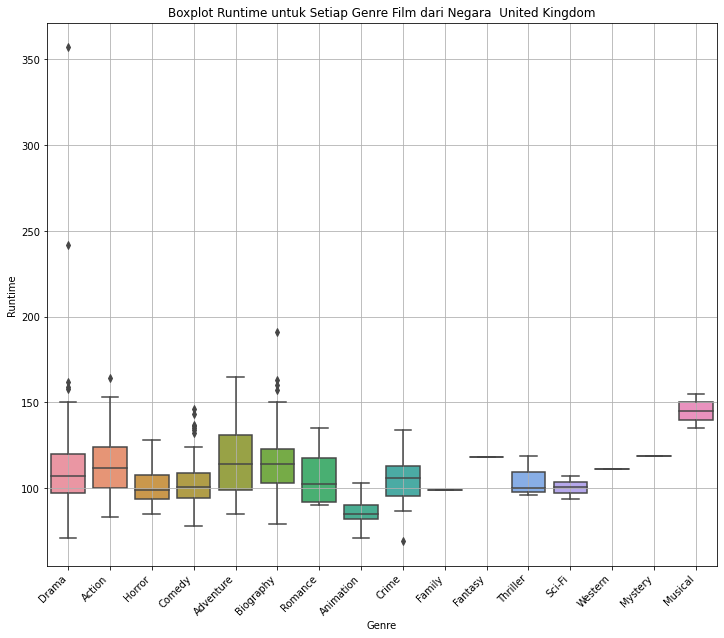

In [159]:
#filter country untuk country united kingdom saja 
film_UK = df[(df['country'] == 'United Kingdom')]

# Buat boxplot untuk melihat distribusi runtime tiap genre
plt.figure(figsize=(12, 10))
#set x menampilkan genre dan y menampilkan runtime 
sns.boxplot(data=film_UK, x='genre', y='runtime')
plt.grid(True)
plt.title('Boxplot Runtime untuk Setiap Genre Film dari Negara  United Kingdom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Runtime')
plt.xlabel('Genre')

plt.show()

> Menurut saya outlier ini masih dapat dikatakan valid. Salah satu contoh adalah adanya outlier pada durasi sebesar 350 dibandingkan dengan median runtime genre drama yang sekitar 100. Ini bisa saja terjadi, karena di kehidupan nyata, memang ada film yang memiliki plot panjang atau sangat pendek. Biasanya terjadi pada film yang juga diputar di festival

> Alasan penggunaan boxplot adalah dengan bar ini kita bisa mengetahui nilai outliers dari boxplot tersebut, karena diperlihatkan juga Q1,Q2, dan Q3

#### 2e. Buatlah visualisasi yang dapat membantu untuk melihat **korelasi** antara `score` dan `gross`. Berikan analisis dan pendapat anda berdasarkan visualisasi yang Anda buat.

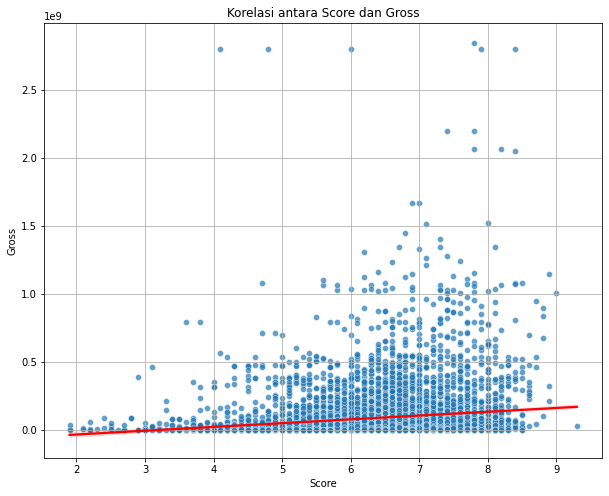

In [160]:
plt.figure(figsize=(10, 8))
# x set jadi score, dan y diset jadi gross
sns.scatterplot(data=df, x='score', y='gross', alpha=0.7)
#penambahan untuk garis tren -> penambahan ini sudah melihat dari tren korelasi yang lebih membentuk linear tren
sns.regplot(data=df, x='score', y='gross', scatter=False, color='red')
plt.title('Korelasi antara Score dan Gross')
plt.ylabel('Gross')
plt.xlabel('Score')
plt.grid(True)
plt.show()

In [161]:
correlation = df['score'].corr(df['gross'])
print("Koefisien korelasi Pearson antara Score dan Gross:", correlation)
#menggunkan pearson karena score dan gross numerik dan bukan suatu kategori ordinal

Koefisien korelasi Pearson antara Score dan Gross: 0.14108369025181608


> Dari scatter plot, trend datanya memang berkorelasi positif, tetapi sama seperti apa yang ditujukan pada graph dan pengecekan secara angka, korelasi positifnya tidak terlalu kuat. Hal ini berarti ada sedikit kenaikan gross yang didapat dari suatu film pada film dengan score yang lebih tinggi. Hal ini dapat dilihat dari graph, kita bisa melihat banyaknya data yang justru dispersed atau tersebar dan tidak mendekati garis linear merah.

#### 2f. Buatlah visualisasi yang dapat menunjukkan perbandingan **distribusi** nilai `score` dari film-film yang berasal dari Mexico dan Spain. Berikan analisis dan pendapat Anda mengenai perbandingan tersebut.

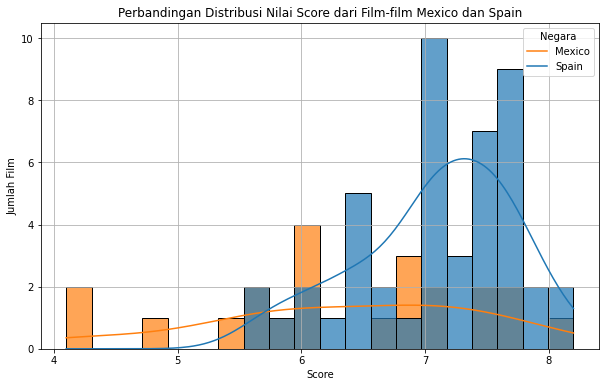

In [162]:
plt.figure(figsize=(10, 6))
#filter data film untuk negara mexico dan spain
df_mexico_spain = df[df['country'].isin(['Mexico', 'Spain'])]
#x nya berupa score, pembagi histplotnya bedasarkan counrty -> overlap
#menggunakan tipe kde plot
sns.histplot(df_mexico_spain, x='score', hue='country', bins=20, kde=True, alpha=0.7)
plt.title('Perbandingan Distribusi Nilai Score dari Film-film Mexico dan Spain')
plt.ylabel('Jumlah Film')
plt.xlabel('Score')
plt.legend(title='Negara', labels=['Mexico', 'Spain'])
plt.grid(True)
plt.show()


In [163]:
df[df['country'].isin(['Mexico'])]['score'].skew()

-0.5099654802261886

In [164]:
df[df['country'].isin(['Spain'])]['score'].skew()

-0.593437232786586

> Terdapat 2 insight yang bisa didapatkan, yakni:
- Pertama, skewed. Baik film Mexico maupun film Spain, dua-duanya memiliki kecenderungan data berpusat di sebelah kanan, atau left-skewed. Ini berarti data cenderung berkumpul di sisi kanan, dan outliers berada di sisi kiri. Ini dapat terlihat di distribusi negara Spain yang tidak memiliki film yang berada di rentang 4 sampai 5. Ini juga dapat dilihat dari banyaknya film Mexico yang hanya berada di sisi kiri, dengan jumlah rata rata tiap interval tersebut sama dengan atau kurang dari angka 2. Ini berarti film di kedua negara tersebut cenderung memiliki score tinggi.
- Kedua, dari segi kelandaian. Meskipun sama-sama left-skewed. Distribusi nilai score film Spain lebih terdistribusi atau tersebar, menyebabkan line histogramnya lebih landai. Dibandingkan dengan film dari Spain, peak nya cenderung berkumpul di rentang angka core setelah 7 sampai 8.


> Alasan menggunakan histogram adalah untuk melihat distribusi frekuensi film di interval nilai score film

#### 2g. Buatlah visualisasi untuk melihat korelasi antara rata-rata `score`, rata-rata `budget` dan rata-rata `votes` dari semua film di **setiap** negara.

In [165]:
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


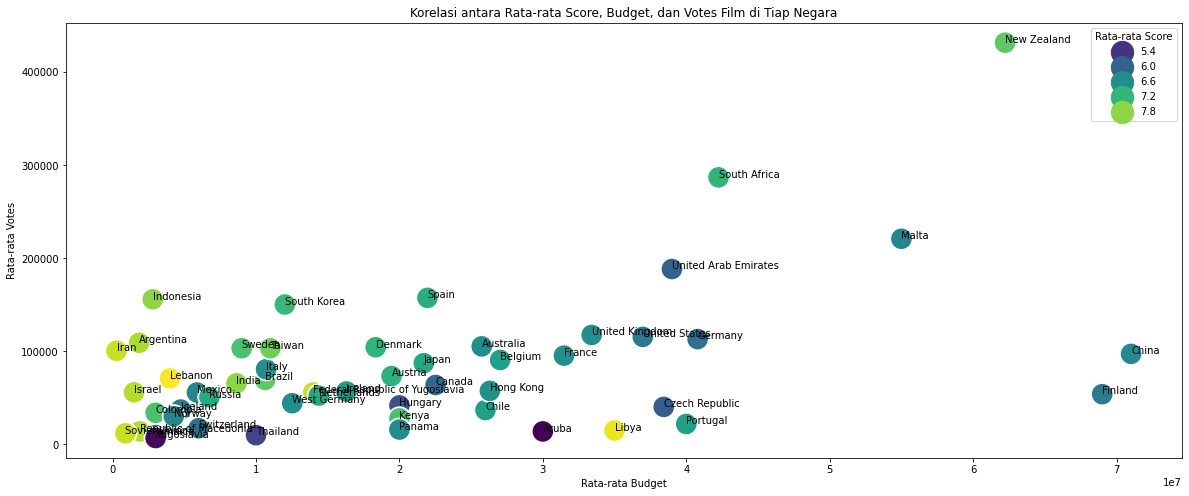

In [166]:

# Agregasi mean dari score, budget, dan votes berdasarkan negara
df_ganull = df.dropna(subset=['score', 'budget', 'votes'])
#didrop dulu nan value biar tidak ada keterangan error bahwa harus finite number
df_country_means = df_ganull.groupby('country').mean()

# Mengatur ukuran gambar
plt.figure(figsize=(20, 8))

# Membuat scatter plot dengan pewarnaan berdasarkan score
sns.scatterplot(data=df_country_means, x='budget', y='votes', hue='score', size='score', sizes=(500, 500), palette='viridis')

# Menambahkan teks untuk setiap titik
for i in range(len(df_country_means)):
    plt.text(df_country_means['budget'][i], df_country_means['votes'][i], df_country_means.index[i])

# Menambahkan label sumbu dan judul
plt.xlabel('Rata-rata Budget')
plt.ylabel('Rata-rata Votes')
plt.title('Korelasi antara Rata-rata Score, Budget, dan Votes Film di Tiap Negara')

# Menampilkan legenda
plt.legend(title='Rata-rata Score')

# Menampilkan plot
plt.show()



>note: saya membuat tiap negara menjadi titik-titik untuk membuat korelasi antara 3 attribut
sumbu x untuk rata-rata budget
sumbu y untuk rata rata votes
size menjelaskan  seberapa besar rata-rata score


> Insight yang bisa didapatkan bisa saja jika kita mengelompokkan tiap negara masuk ke dalam benua apa, yang ternyata mengantarkan ke suatu pola data. Bisa juga melihat karakteristik dari negara. Tetapi kalau dilihat, data ini menunjukkan negara dominan berada di kuadran 3, yang mana rata rata budget untuk film yang cenderung rendah ke mid, dan rata rata votes untuk film yang dari mid sampai rendah. Sedangkan, hanya beberapa negara yang memiliki votes tinggi serta budget tinggi seperti New Zealand. Dan ada negara seperti malta, china, dan finalan yang memiliki rata-rata budget tinggi tetapi rata rata votes yang sama rendahnya dengan negara dengan rata-rata budget rendah  dan rata-rata score yang rendah. Sedangkan untuk pattern rata-rata score, warna hijau sampai kuning justru cenderung ditemukan di dua ujung diagram yang berlawanan, seperti indonesia, argentina, iran, lebanon dengan new zealand yang berada di ujung seberang.


Insight yang didapat ini korelasi antara 3 attribut 

# Sumber Data
- movies.csv: https://www.kaggle.com/datasets/danielgrijalvas/movies